In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


In [23]:
#features: 1. adj prices of last N weeks
#          2. volume of stock trades in last N weeks
#.         3. Opening-Closing of last N weeks
#.         4. High-Low of last N weeks
#. source: https://towardsdatascience.com/machine-learning-techniques-applied-to-stock-price-prediction-6c1994da8001
def process_data(data,N):
    data["O-C"]=data["Open"]-data["Close"]
    data["H-L"]=data["High"]-data["Low"]
    X=np.zeros((len(data)-N,4*N))
    t=np.zeros((1,N))
    q=np.zeros((N,1))
   
    for i in range(0,len(data)-N):
        q=data.loc[i:i+N-1,"Volume"]
      
        t=np.transpose(q)
        X[i,:N]=t
        q=data.loc[i:i+N-1,"Adj Close"]
        t=np.transpose(q)
        X[i,N:2*N]=t
        q=data.loc[i:i+N-1,"O-C"]
        t=np.transpose(q)
        X[i,2*N:3*N]=t
        q=data.loc[i:i+N-1,"H-L"]
        t=np.transpose(q)
        X[i,3*N:4*N]=t
        
   
    
   # dates2=data.loc[int((len(data)-N)*0.67):,:]
    dates=pd.to_datetime(data["Date"])
   # dates2=pd.to_datetime(dates2["Date"])
    dates=dates[N:]
    q=int(len(dates)*0.67)
    dates2=dates[q:]
    Y=data["Adj Close"]
    Y=Y[N:]
    Y=Y.to_numpy()
    
   
    return X,Y,dates,dates2

In [24]:
def featureScale(X):
    scaler = preprocessing.StandardScaler().fit(X)
    X_scaled = scaler.transform(X)

    return X_scaled

In [25]:
def adjustedR2(score,n,p):
    adj=1-(1-score**2)*(n-1)/(n-p-1)
    return adj

In [26]:
def LinReg(X,Y):
   
    X_s=featureScale(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_s, Y, test_size=0.33,shuffle=False)
    reg = LinearRegression().fit(X_train, y_train)
    pred=reg.predict(X_test)

    score=reg.score(X_test,y_test)
    
    coef=reg.coef_
    error=mean_squared_error(y_test, pred)
    
    score=adjustedR2(score,len(y_test),20)

   
  
    return pred,score

In [27]:
def ForestReg(X,Y):
  
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,shuffle=False)
    regr = RandomForestRegressor(random_state=0)
    regr.fit(X,Y)
    pred=regr.predict(X_test)
    score=regr.score(X_test,y_test)
    score=adjustedR2(score,len(y_test),20)
    return pred,score

In [28]:
def MLPReg(X,Y,learn,i,layers):
    
    X_s=featureScale(X)
   
   
    X_train, X_test, y_train, y_test = train_test_split(X_s, Y, test_size=0.33,shuffle=False)
    regr = MLPRegressor(hidden_layer_sizes=(layers,),random_state=1,alpha=0.01, max_iter=i,learning_rate_init=learn).fit(X_train, y_train)
    pred=regr.predict(X_test)
    score=regr.score(X_test,y_test)

    score=adjustedR2(score,len(y_test),20)
    
   
    
    return pred,score

In [29]:
def LassoLinReg(X,Y):
   
    X_s=featureScale(X)
    X_train, X_test, y_train, y_test = train_test_split(X_s, Y, test_size=0.33,shuffle=False)
    clf = linear_model.Lasso(alpha=0.1)
    reg=clf.fit(X_train,y_train)
    pred=reg.predict(X_test)
    score=reg.score(X_test,y_test)
   
    score=adjustedR2(score,len(y_test),20)
    return pred,score

In [30]:
def svm_(X,Y):
    
    X_s=featureScale(X)
   
    X_train, X_test, y_train, y_test = train_test_split(X_s, Y, test_size=0.33,shuffle=False)

    
    clf = SVR(kernel='linear',degree=3,C=10000.0,epsilon=0.01)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    score=clf.score(X_test,y_test)
    score=adjustedR2(score,len(y_test),20)
    return pred,score
    

In [31]:
def plot_graph(y,p,dates,dates2,firm,model):
    plt.figure(figsize=(9,6),dpi=100)
    labels=['Actual Adj Closing Price']
    labels2=['Predicted Adj Closing Price']
    plt.plot(dates,y,"g-",linewidth=1,label=labels)
    plt.plot(dates2,p,"r-",linewidth=1,label=labels2)
    plt.title("Adj Closing Price prediction of "+firm+" using "+model+" Regression")
    plt.xlabel('Date')
    plt.ylabel('Adj Closing Price in USD')
    
    plt.legend()
    plt.grid()
    plt.show()


In [32]:
tsla=pd.read_csv("TSLA.csv")
aapl=pd.read_csv("AAPL.csv")
ttm=pd.read_csv("TTM.csv")
X_tsla,Y_tsla,dates_tsla,dates2_tsla=process_data(tsla,5)
X_aapl,Y_aapl,dates_aapl,dates2_aapl=process_data(aapl,5)
X_ttm,Y_ttm,dates_ttm,dates2_ttm=process_data(ttm,5)
scores=np.zeros((3,5))

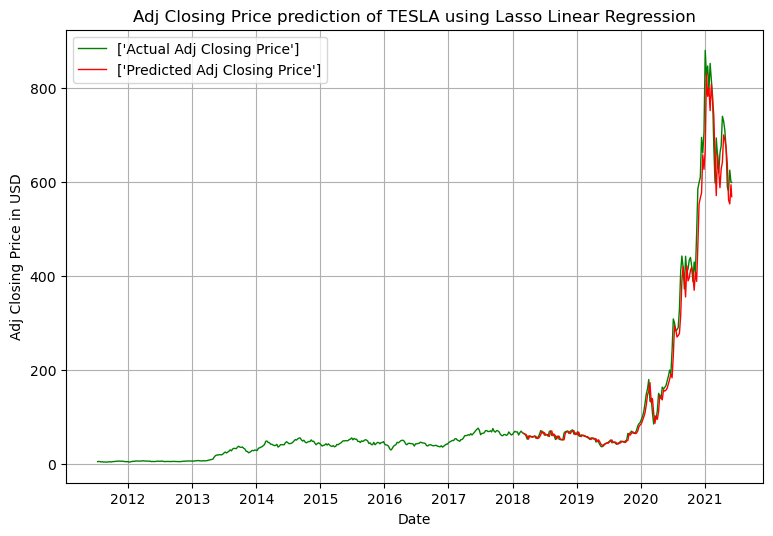

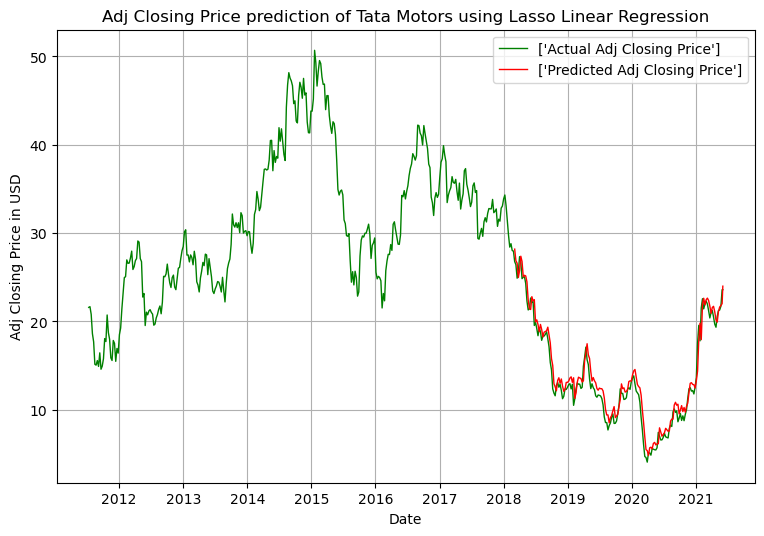

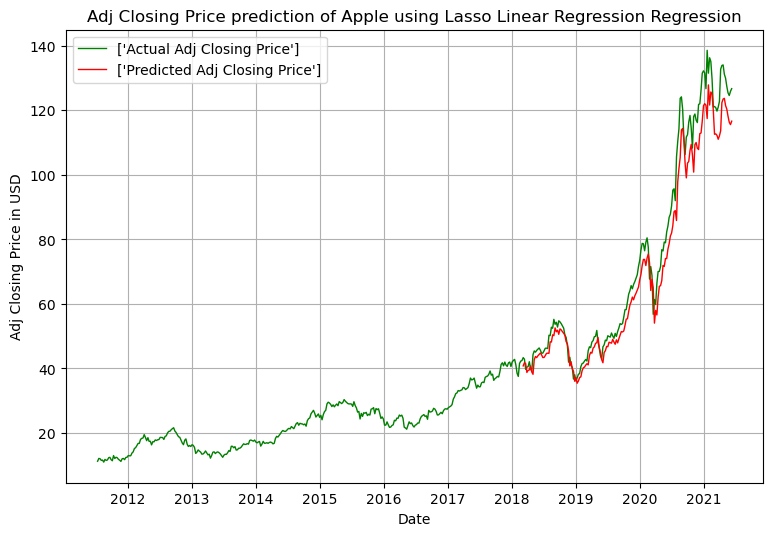

In [33]:
pred_tsla_llr,score_tsla_llr=LassoLinReg(X_tsla,Y_tsla)
plot_graph(Y_tsla,pred_tsla_llr,dates_tsla,dates2_tsla,"TESLA","Lasso Linear")

pred_ttm_llr,score_ttm_llr=LassoLinReg(X_ttm,Y_ttm)
plot_graph(Y_ttm,pred_ttm_llr,dates_ttm,dates2_ttm,"Tata Motors","Lasso Linear")

pred_aapl_llr,score_aapl_llr=LassoLinReg(X_aapl,Y_aapl)
plot_graph(Y_aapl,pred_aapl_llr,dates_aapl,dates2_aapl,"Apple","Lasso Linear Regression")

scores[:,0]=[score_tsla_llr,score_ttm_llr,score_aapl_llr]

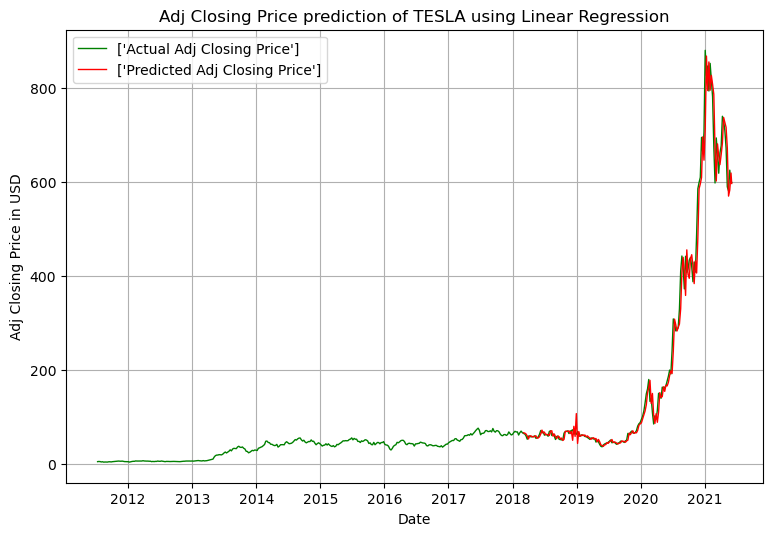

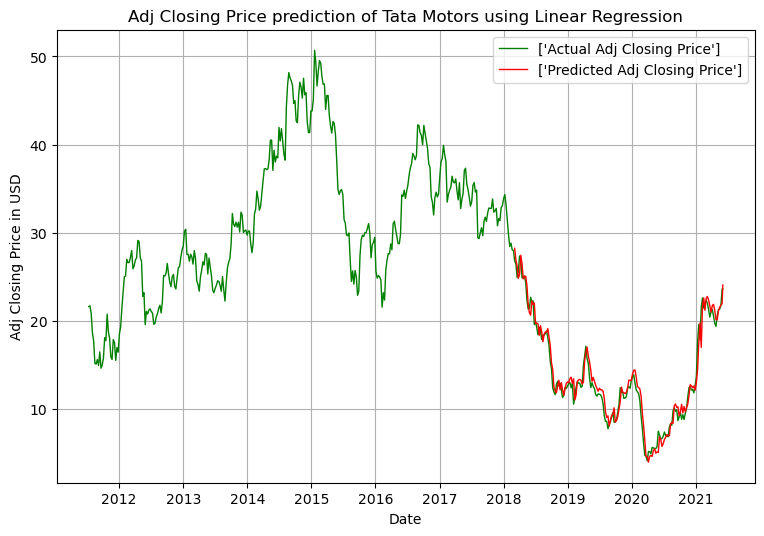

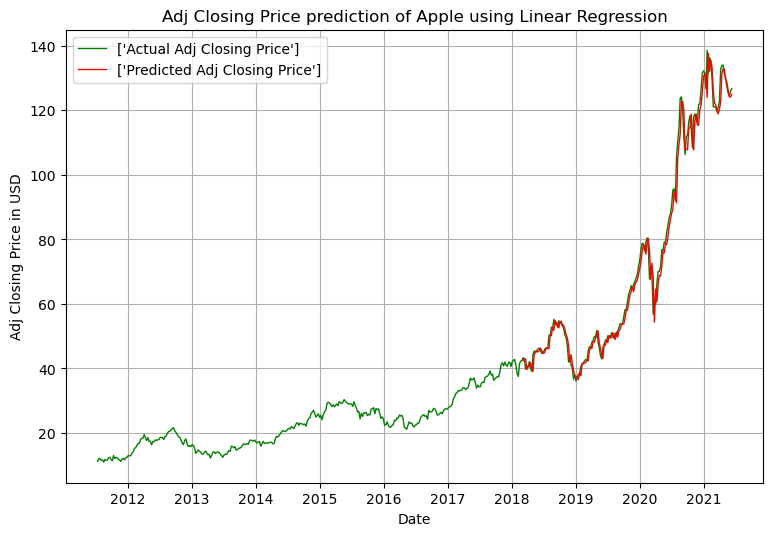

In [34]:

pred_tsla_lr,score_tsla_lr=LinReg(X_tsla,Y_tsla)
plot_graph(Y_tsla,pred_tsla_lr,dates_tsla,dates2_tsla,"TESLA","Linear")

pred_ttm_lr,score_ttm_lr=LinReg(X_ttm,Y_ttm)
plot_graph(Y_ttm,pred_ttm_lr,dates_ttm,dates2_ttm,"Tata Motors","Linear")

pred_aapl_lr,score_aapl_lr=LinReg(X_aapl,Y_aapl)
plot_graph(Y_aapl,pred_aapl_lr,dates_aapl,dates2_aapl,"Apple","Linear")
scores[:,1]=[score_tsla_lr,score_ttm_lr,score_aapl_lr]

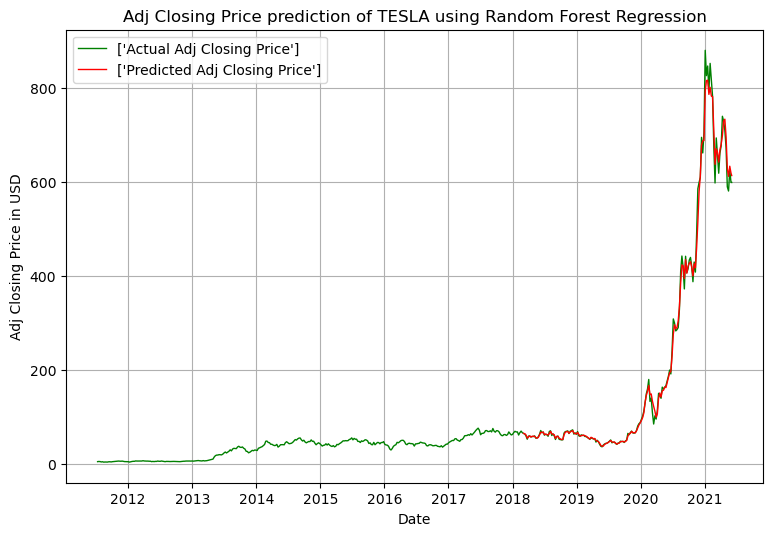

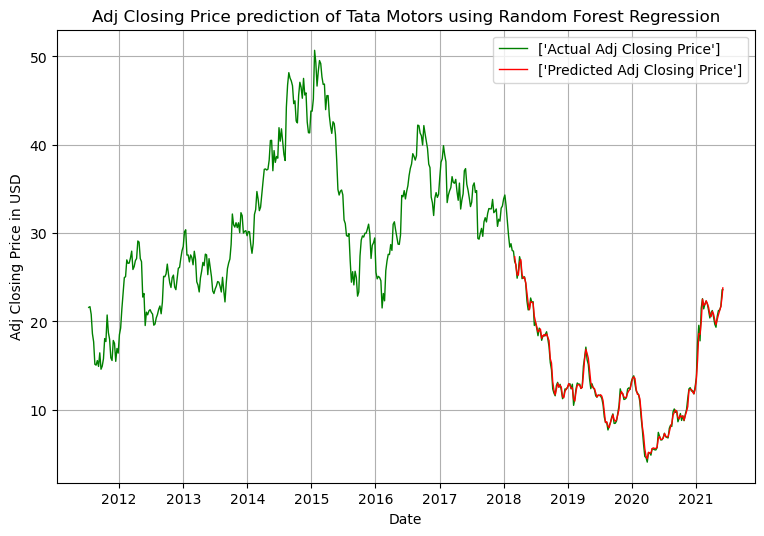

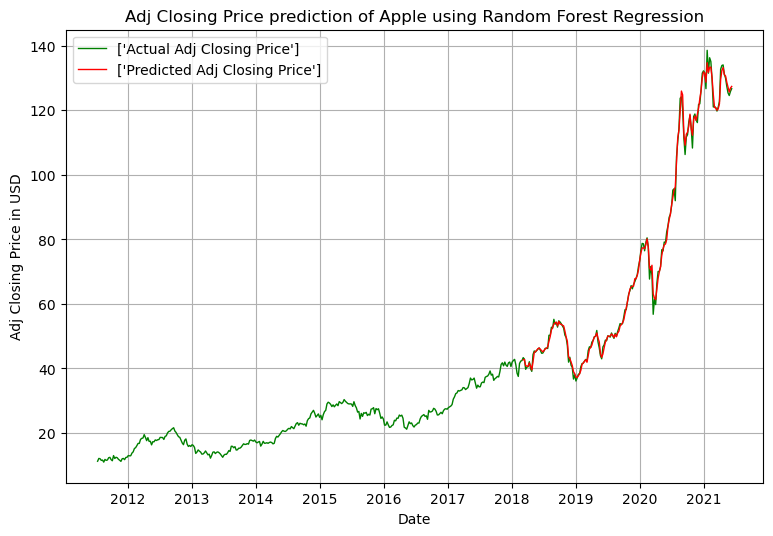

In [35]:

pred_tsla_rf,score_tsla_rf=ForestReg(X_tsla,Y_tsla)
plot_graph(Y_tsla,pred_tsla_rf,dates_tsla,dates2_tsla,"TESLA","Random Forest")

pred_ttm_rf,score_ttm_rf=ForestReg(X_ttm,Y_ttm)
plot_graph(Y_ttm,pred_ttm_rf,dates_ttm,dates2_ttm,"Tata Motors","Random Forest")

pred_aapl_rf,score_aapl_rf=ForestReg(X_aapl,Y_aapl)
plot_graph(Y_aapl,pred_aapl_rf,dates_aapl,dates2_aapl,"Apple","Random Forest")
scores[:,2]=[score_tsla_rf,score_ttm_rf,score_aapl_rf]

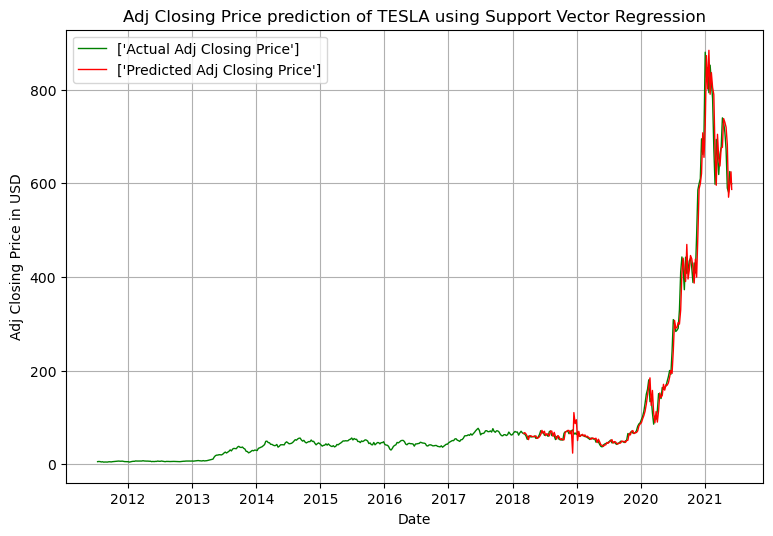

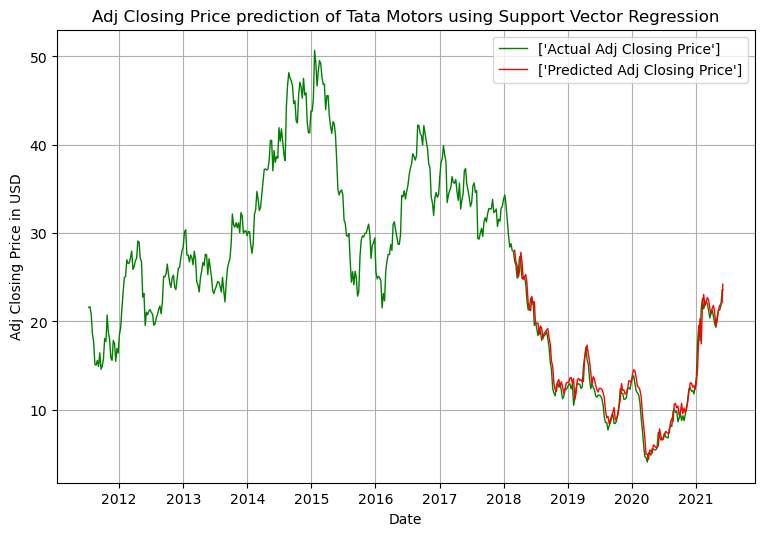

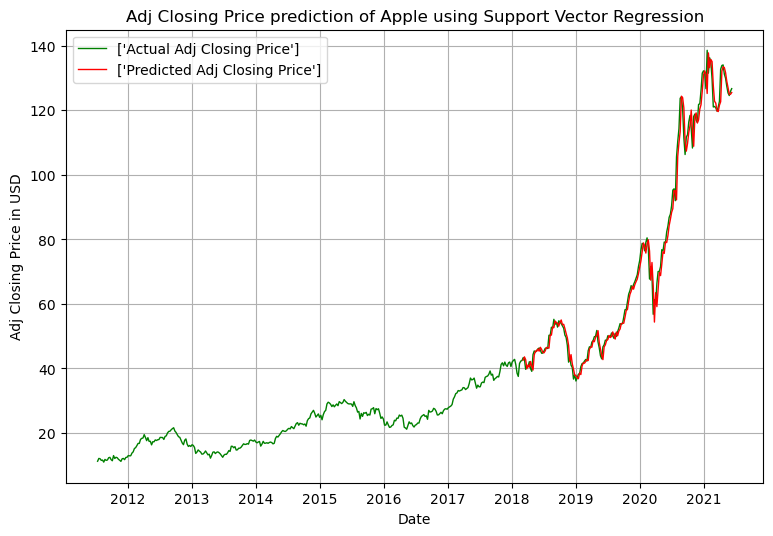

In [36]:

pred_tsla_svr,score_tsla_svm=svm_(X_tsla,Y_tsla)
plot_graph(Y_tsla,pred_tsla_svr,dates_tsla,dates2_tsla,"TESLA","Support Vector")

pred_ttm_svr,score_ttm_svm=svm_(X_ttm,Y_ttm)
plot_graph(Y_ttm,pred_ttm_svr,dates_ttm,dates2_ttm,"Tata Motors","Support Vector")

pred_aapl_svr,score_aapl_svm=svm_(X_aapl,Y_aapl)
plot_graph(Y_aapl,pred_aapl_svr,dates_aapl,dates2_aapl,"Apple","Support Vector")

scores[:,3]=[score_tsla_svm,score_ttm_svm,score_aapl_svm]

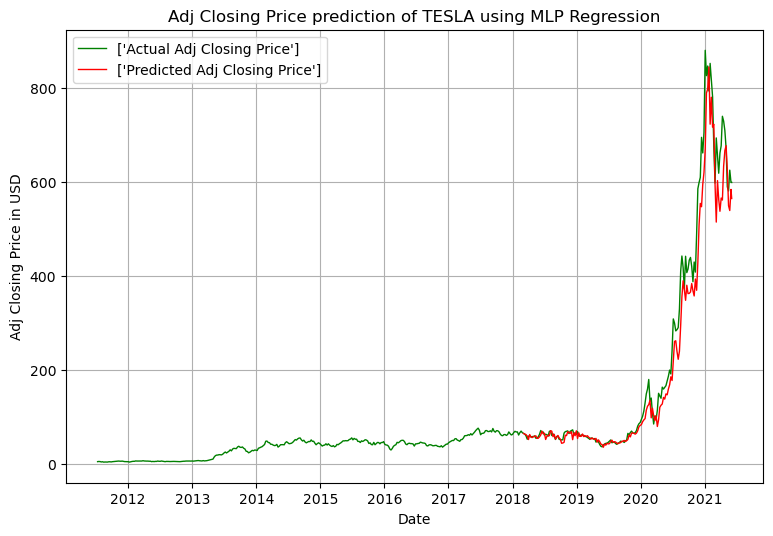

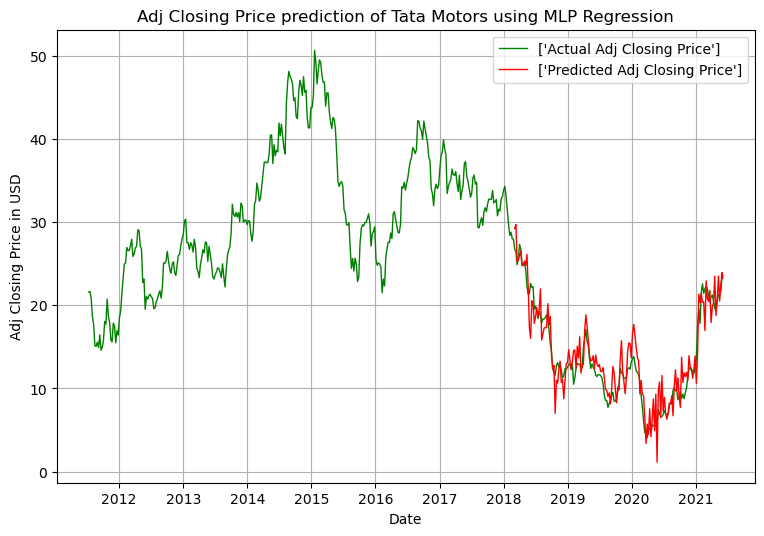

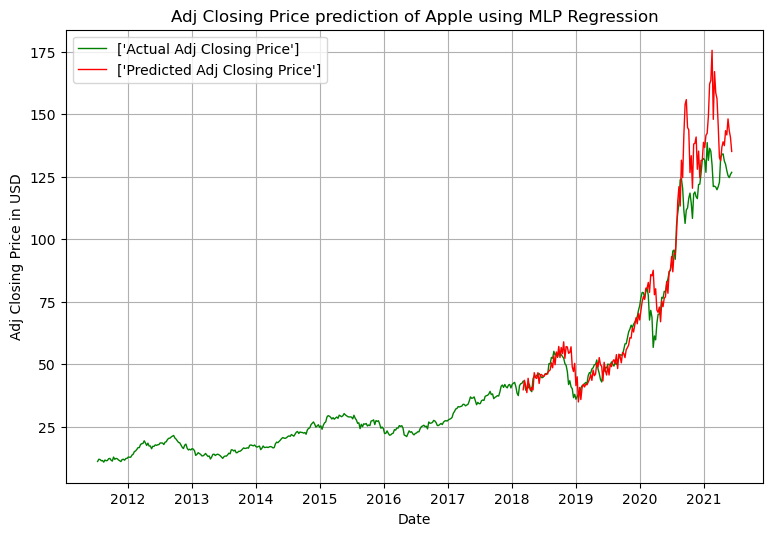

In [37]:

pred_tsla_mlp,score_tsla_mlp=MLPReg(X_tsla,Y_tsla,0.01,1500,100)
plot_graph(Y_tsla,pred_tsla_mlp,dates_tsla,dates2_tsla,"TESLA","MLP")

pred_ttm_mlp,score_ttm_mlp=MLPReg(X_ttm,Y_ttm,0.07,3000,100)
plot_graph(Y_ttm,pred_ttm_mlp,dates_ttm,dates2_ttm,"Tata Motors","MLP")

pred_aapl_mlp,score_aapl_mlp=MLPReg(X_aapl,Y_aapl,0.1,1500,75)
plot_graph(Y_aapl,pred_aapl_mlp,dates_aapl,dates2_aapl,"Apple","MLP")

scores[:,4]=[score_tsla_mlp,score_ttm_mlp,score_aapl_mlp]

In [38]:
adjScores=pd.DataFrame(scores,columns=['LLR','Linear','Random Forest','SVR','MLP'])
adjScores["Firm"]=['Tesla','Tata Motors','Apple']
cols=['Firm','LLR','Linear','Random Forest','SVR','MLP']
adjScores=adjScores[cols]
adjScores=adjScores.style.set_caption("Adjusted R2 scores:")
adjScores

,Firm,LLR,Linear,Random Forest,SVR,MLP
0,Tesla,0.953530,0.963902,0.991837,0.962714,0.915523
1,Tata Motors,0.908727,0.921582,0.987702,0.918306,0.734761
2,Apple,0.906653,0.973983,0.995958,0.975936,0.699866
